# Employee Attrition Prediction

### Imporing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
import seaborn as sns
from imblearn.over_sampling import SMOTE
import torch.nn as nn
import torch
import torch.optim as optim

### Extracting Data into pandas

In [2]:
data = pd.read_csv("C:/Users/shevk/OneDrive/Documents/Masters/ML/CS6140/Project/Data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

### Printing datashape and information about data

In [3]:
print("Data Shape: ", data.shape, "\n")
print("Information about data", data.info(), "\n")
print(data.describe())

Data Shape:  (1470, 35) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14

In [4]:
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

### Checking for missing values

In [5]:
print("Missing Values: ", data.isnull().sum())

Missing Values:  Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

There are no missing values in the dataset

### Printing unique values in categorical columns

In [6]:
print("Unique values in object type columns: \n")
print(data["Gender"].unique())
print(data["MaritalStatus"].unique())
print(data["Department"].unique())
print(data["JobRole"].unique())
print(data["OverTime"].unique())
print(data["Attrition"].unique())


Unique values in object type columns: 

['Female' 'Male']
['Single' 'Married' 'Divorced']
['Sales' 'Research & Development' 'Human Resources']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Yes' 'No']
['Yes' 'No']


In [7]:
data.drop(columns=['EmployeeCount', 'Over18', 'StandardHours',
                   'EmployeeNumber'], inplace=True)

### Plot distribution of numerical features

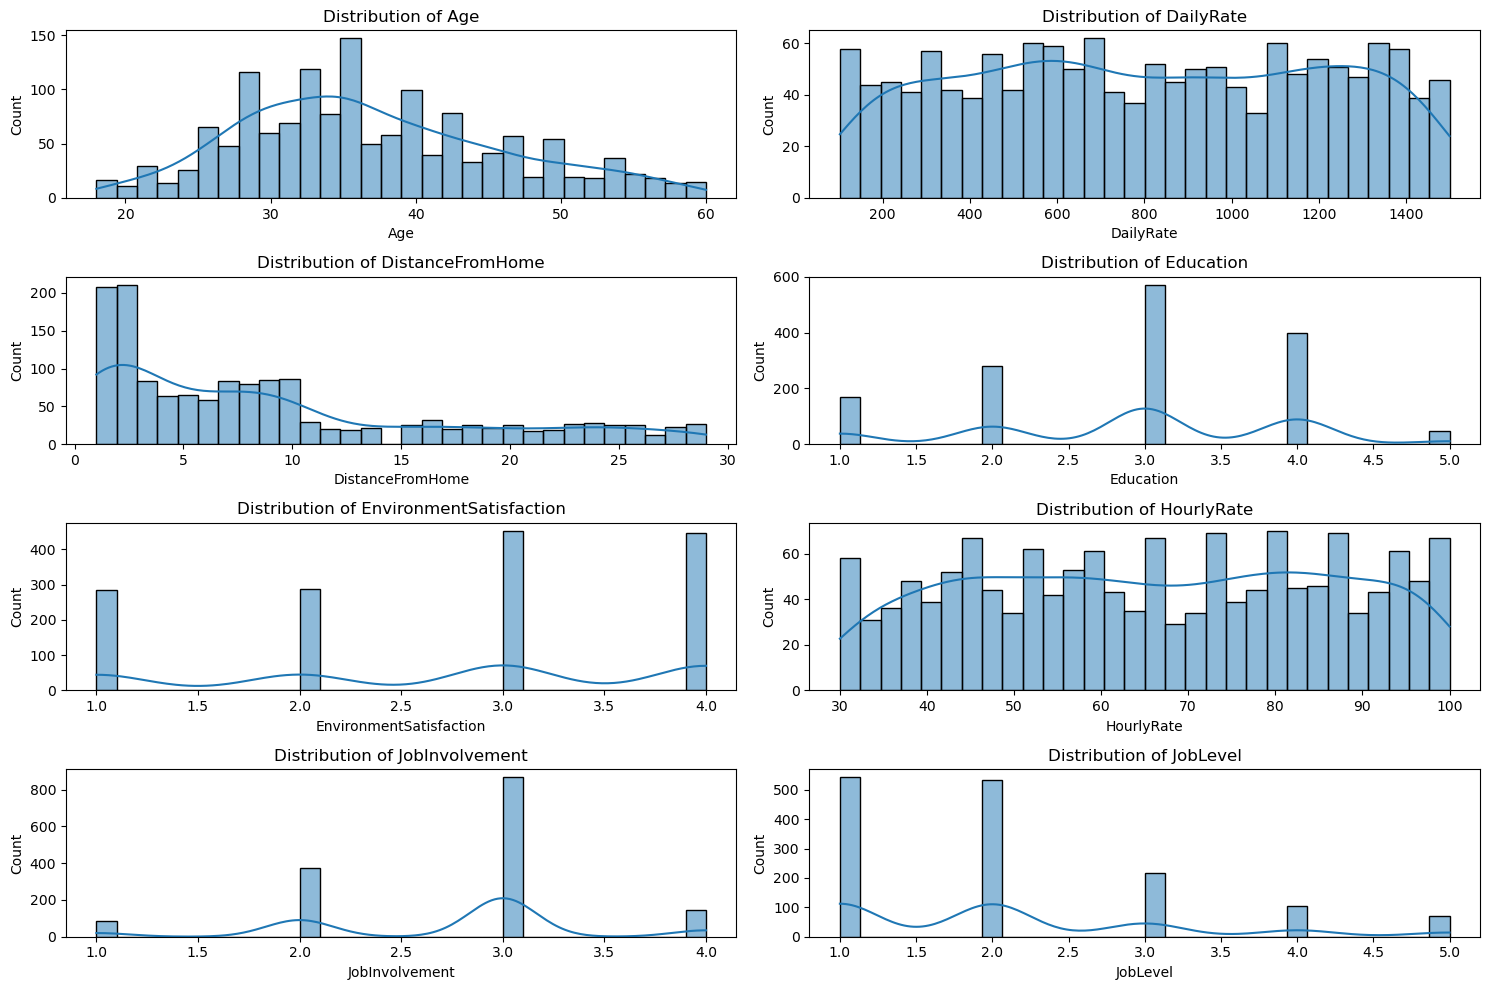

In [8]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:8]):
    plt.subplot(4, 2, i + 1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


The figure shows the distributions of several numerical features in the dataset. Age is normally distributed with most employees between 25 and 45 years old. DistanceFromHome is right-skewed, indicating most employees live close to work. Education, EnvironmentSatisfaction, JobInvolvement, and JobLevel are discrete and show peaks at certain levels, with level 3 or 4 being most common. DailyRate and HourlyRate are relatively uniform. These patterns help us understand data spread and identify skewed or imbalanced features.

### Countplots for categorical features

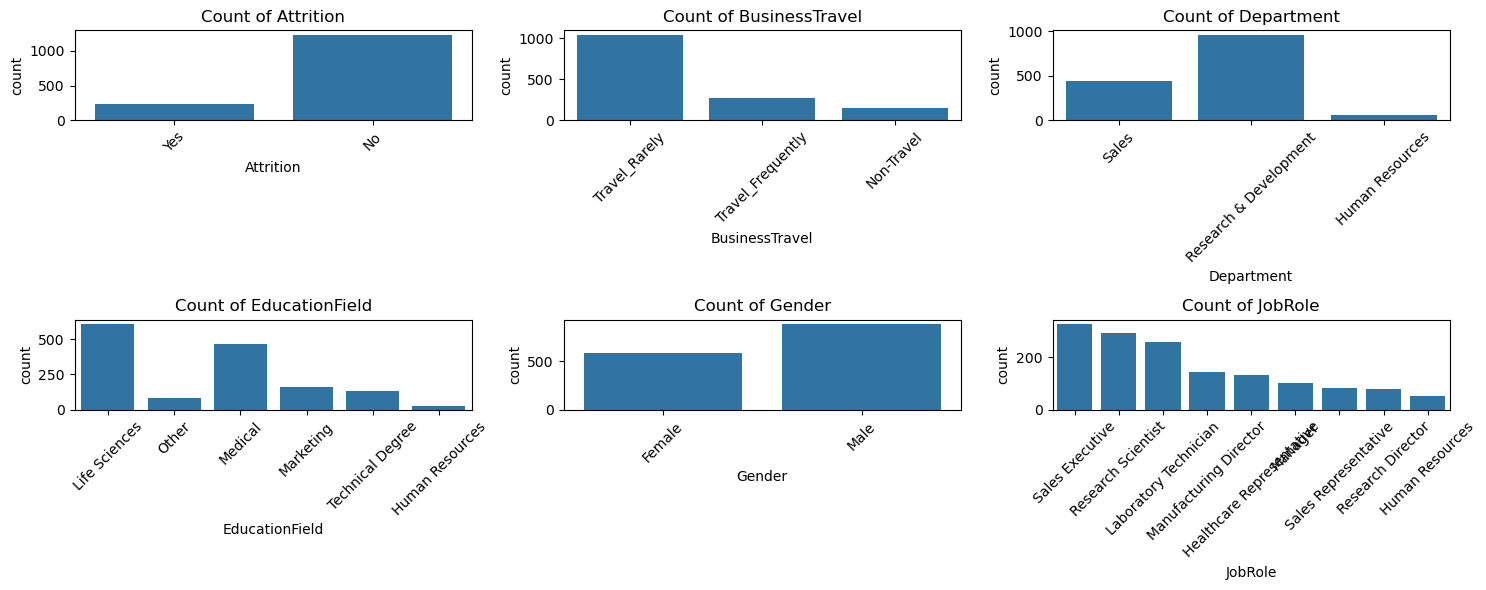

In [9]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(15, 6))
for i, col in enumerate(categorical_cols[:6]):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=data[col])
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This figure shows the distribution of key categorical features. Most employees have not left the company, showing class imbalance in attrition. Travel_Rarely is the most common business travel type. Most employees work in the Research & Development department. Life Sciences and Medical are the top education fields. There are slightly more male employees than female. Sales Executive and Research Scientist are the most common job roles. These distributions help us understand category dominance and potential bias in the dataset.

### Attrition vs numerical variables

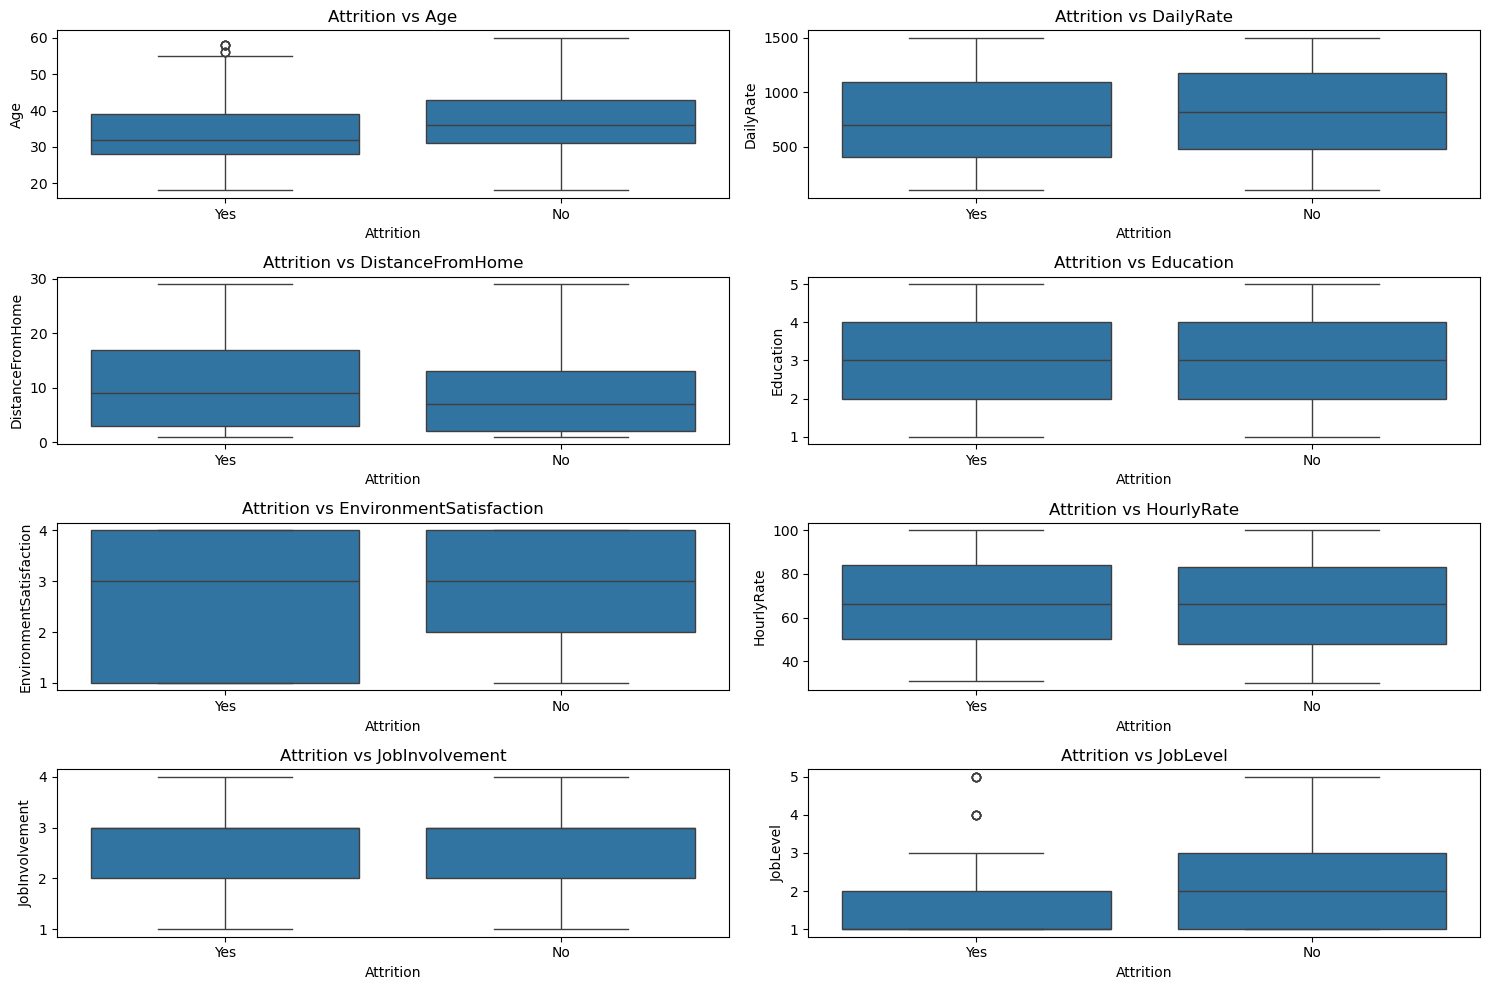

In [10]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:8]):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=data['Attrition'], y=data[col])
    plt.title(f"Attrition vs {col}")
plt.tight_layout()
plt.show()


The plots shows the relationship between attrition and various numerical features using box plots. Employees who left tend to be slightly younger and have longer distances from home. They also show lower environment satisfaction, job involvement, and job level on average. Education, daily rate, hourly rate, and other features show less variation between attrition groups. These patterns highlight which factors may influence an employee’s likelihood of leaving.

### Attrition vs categorical variables

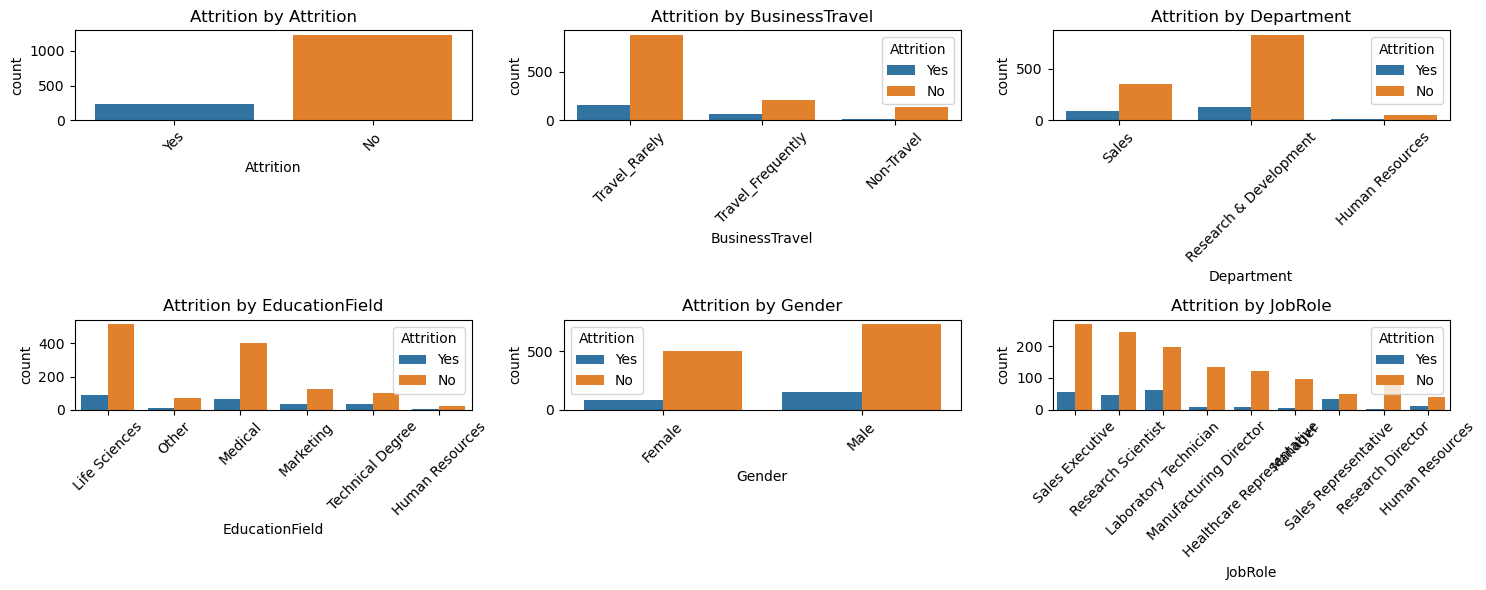

In [11]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(categorical_cols[:6]):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=data[col], hue=data['Attrition'])
    plt.title(f"Attrition by {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The attrition counts across various categorical features. Attrition is higher among employees who travel frequently and those in Sales. Males and females show similar attrition patterns. Education fields like Life Sciences and Medical have more cases of attrition. Sales Executives and Laboratory Technicians show relatively higher attrition compared to other job roles. These insights help identify which employee groups are more at risk.

### Checking for categorical columns

In [12]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


### Encoding categorical columns

In [13]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['OverTime'] = data['OverTime'].map({'Yes': 1, 'No': 0})
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})


# One-hot encode the remaining categoricals
data = pd.get_dummies(data, columns=[
    'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'
], drop_first=True)


In [14]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_cols)

Categorical Columns: []


### Standardization of features

In [15]:
from sklearn.preprocessing import StandardScaler

X = data.drop('Attrition', axis=1)
y = data['Attrition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Correlation matrix

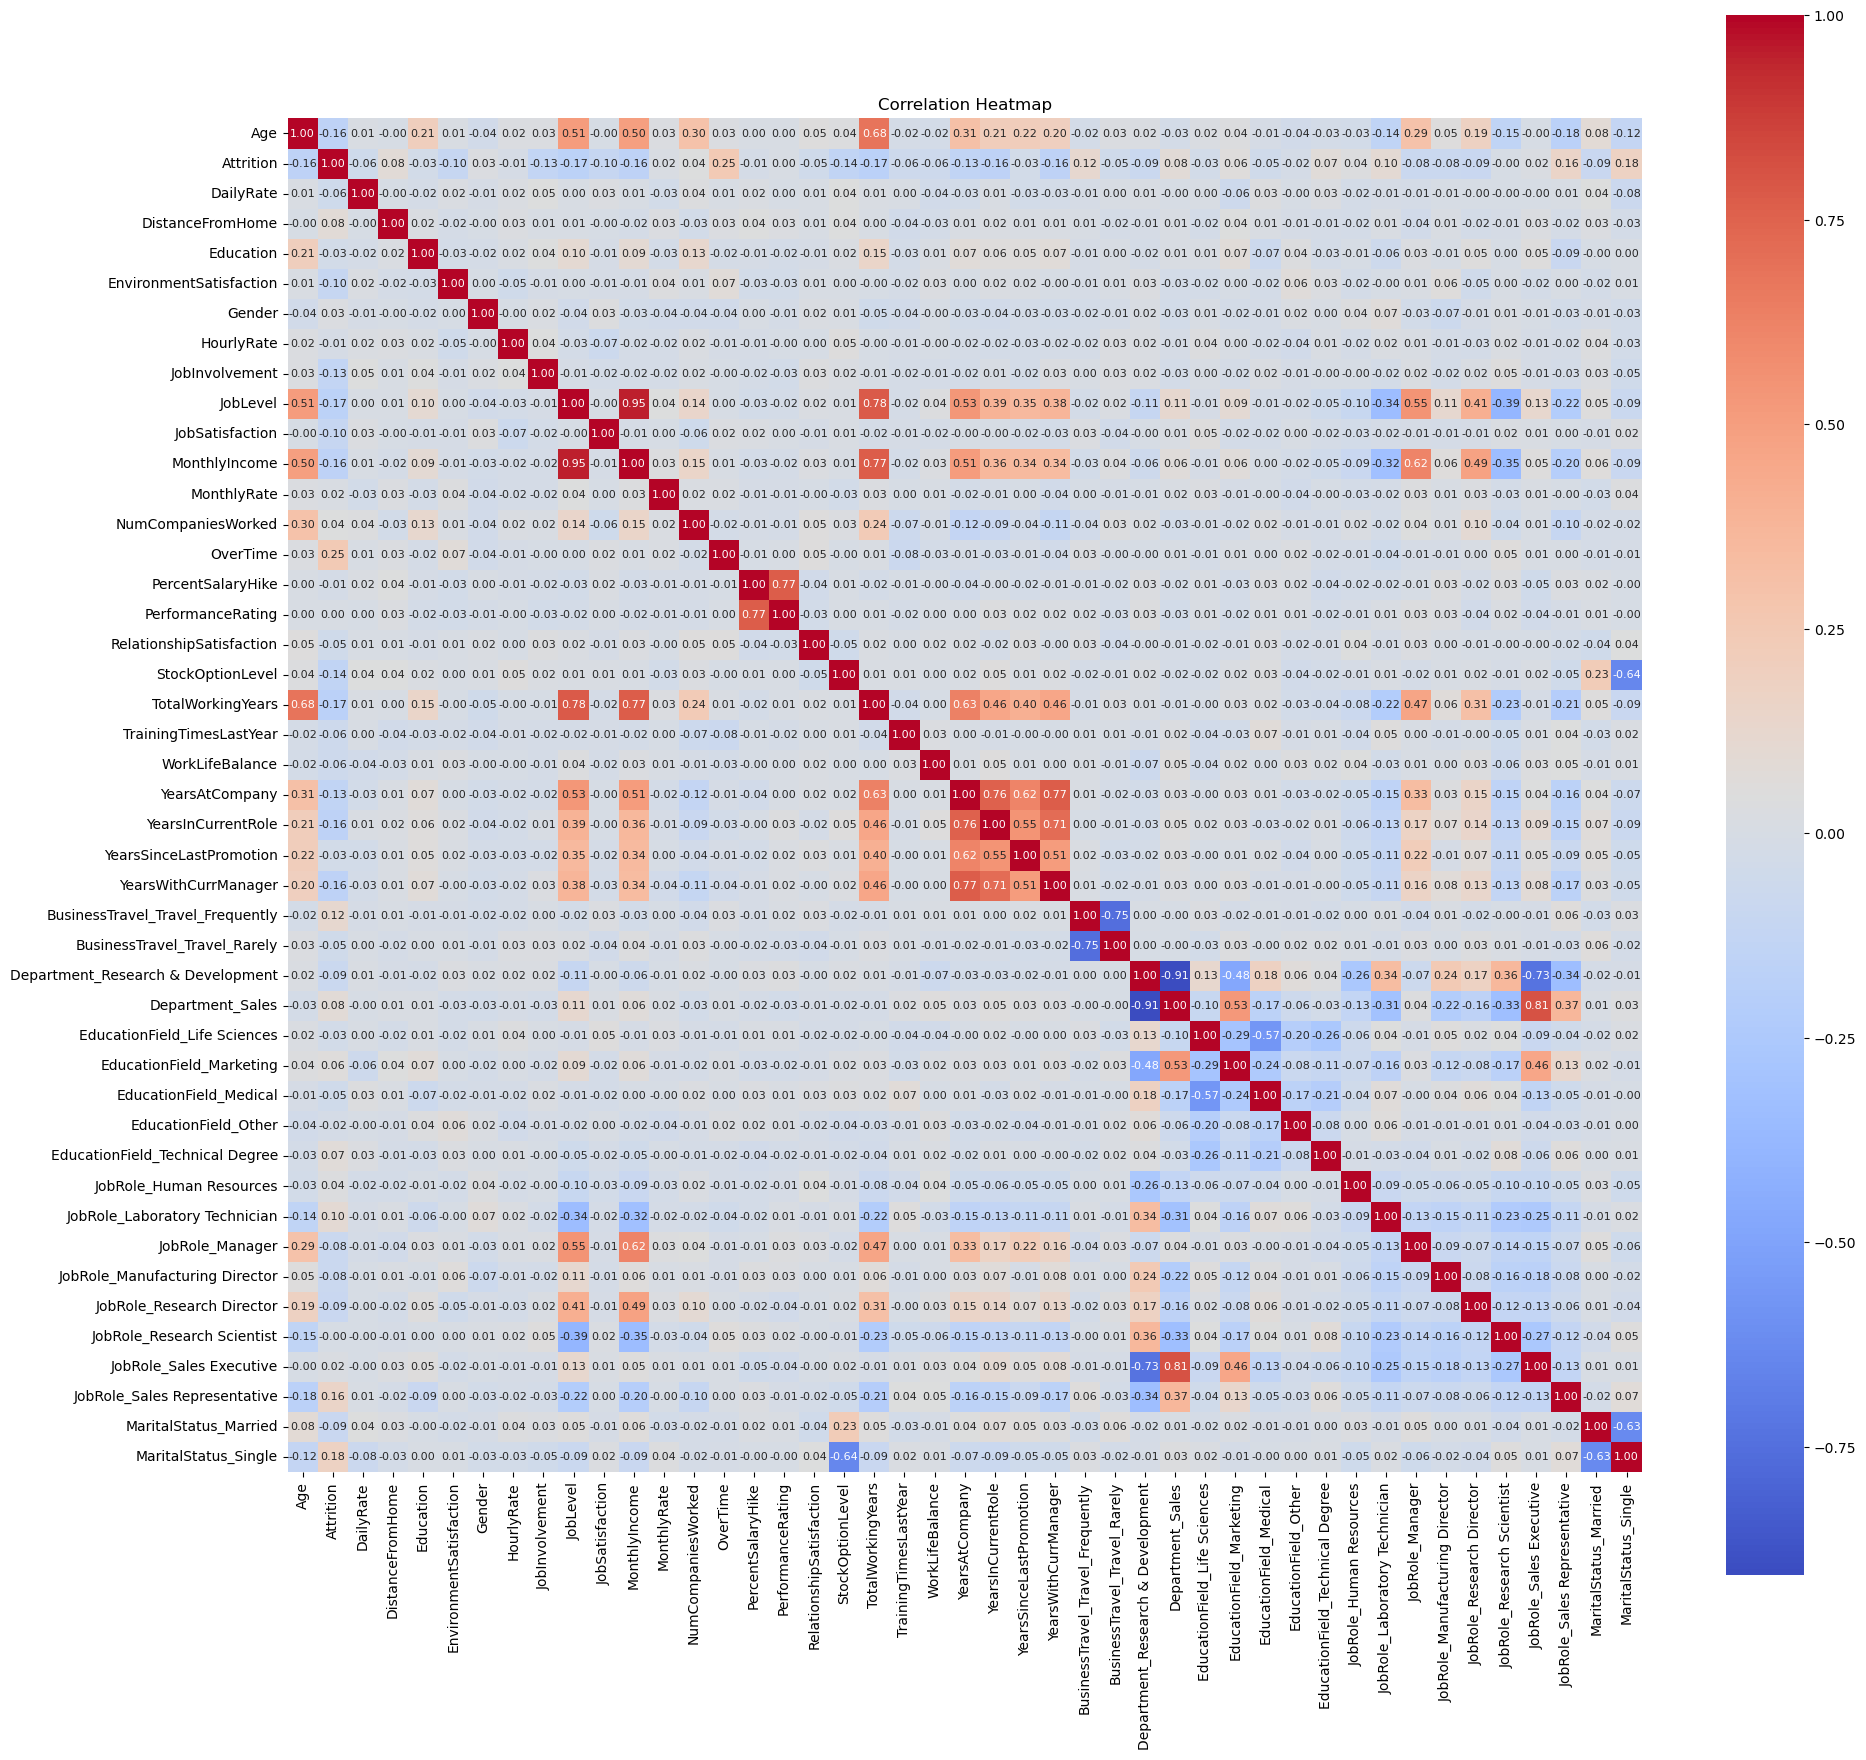

In [16]:
plt.figure(figsize=(20, 18))
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                annot_kws={"size": 8}, cbar=True, square=True)
plt.title(f"Correlation Heatmap")
plt.tight_layout()
plt.show()

This correlation heatmap shows relationships between numerical and encoded categorical features. Attrition shows weak negative correlations with features like JobSatisfaction, Age, MonthlyIncome, and YearsAtCompany, indicating that lower values in these areas are slightly linked to higher attrition. Strong positive correlations are seen among MonthlyIncome, JobLevel, and TotalWorkingYears, suggesting multicollinearity. Most other features show weak or no correlation, highlighting the need for non-linear models to capture complex patterns.

In [17]:
X = data.drop(columns=['Attrition'])
y = data['Attrition']

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (1479, 44)
Test Shape: (370, 44)


## Defining and Training Models

### 1. Multilayer Perceptron

In [20]:
class customMLP(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.3):
    super(customMLP, self).__init__()
    # defining layers
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.dropout = nn.Dropout(dropout_rate)
    self.relu = nn.ReLU()
    self.layer2 = nn.Linear(hidden_size, output_size)
    self.sigmoid = nn.Sigmoid()

    nn.init.xavier_uniform_(self.layer1.weight)
    nn.init.xavier_uniform_(self.layer2.weight)

  def forward(self, x):
    x = self.layer1(x)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.layer2(x)
    x = self.sigmoid(x)
    return x


In [21]:
def train(model, X_train, y_train, X_val = None, y_val = None, epochs=500, batch_size=32, learning_rate=0.001,
          weight_decay = 0.01, patience = 50):
    # Converting data to torch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train)

    if X_val is not None and y_val is not None:
      X_val_tensor = torch.FloatTensor(X_val)
      y_val_tensor = torch.FloatTensor(y_val)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # For tracking history
    history = {
        'loss': [],
        'accuracy': [],
        'val_loss': [],
        'val_accuracy': []
    }

    # For early stopping
    best_val_loss = float('inf')
    best_model_state = None
    early_stop_counter = 0

    # number of samples
    n_samples = X_train_tensor.shape[0]

    # Training loop
    for epoch in range(epochs):
      model.train() # setting model to training mode

      # mini batch training
      indices = np.random.permutation(n_samples)
      epoch_loss = 0
      correct = 0

      for i in range(0, n_samples, batch_size):
        end = min(i + batch_size, n_samples)
        batch_indices = indices[i:end]

        # Get batch
        X_batch = X_train_tensor[batch_indices]
        y_batch = y_train_tensor[batch_indices]

        # Forward pass
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Back-prop and optimization
        loss.backward()
        optimizer.step()

        # Tracking loss
        epoch_loss += loss.item() * (end-i)

        # Tracking accuracy
        predicted = (outputs >= 0.5).float()
        correct += (predicted == y_batch).sum().item()

      # Calculating epoch metrics
      epoch_loss /= n_samples
      epoch_acc = correct / n_samples

      history['loss'].append(epoch_loss)
      history['accuracy'].append(epoch_acc)


      # Validation
      if X_val is not None and y_val is not None:
        model.eval()
        with torch.no_grad():
          val_outputs = model(X_val_tensor)
          val_loss = criterion(val_outputs, y_val_tensor).item()
          val_predicted = (val_outputs >= 0.5).float()
          val_accuracy = (val_predicted == y_val_tensor).sum().item() / y_val_tensor.size(0)

          history['val_loss'].append(val_loss)
          history['val_accuracy'].append(val_accuracy)

          if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict()
            early_stop_counter = 0
          else:
            early_stop_counter += 1

          if early_stop_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            model.load_state_dict(best_model_state)
            break

          if (epoch %50 == 0 or epoch == epochs-1):
            print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f} - Val Loss: {val_loss:.4f} - Val Accuracy: {val_accuracy:.4f}")

      else:
        if (epoch %50 == 0 or epoch == epochs-1):
          print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}")

    if (early_stop_counter < patience and best_model_state is not None):
        model.load_state_dict(best_model_state)

    return history

def evaluate(model, X_test, y_test):
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.FloatTensor(y_test)

    model.eval()

    # Predicting
    with torch.no_grad():
      y_pred_tensor = model(X_test_tensor)
      y_pred = (y_pred_tensor >= 0.5).float().numpy()

    # converting to numpy
    if isinstance(y_test, torch.Tensor):
      y_test = y_test.numpy()

    # reshaping if needed
    if len(y_test.shape) == 1:
      y_test = y_test.reshape(-1, 1)

    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': {'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp}
    }

Epoch 1/400 - Loss: 0.7082 - Accuracy: 0.5997 - Val Loss: 0.5522 - Val Accuracy: 0.7541
Epoch 51/400 - Loss: 0.2452 - Accuracy: 0.9074 - Val Loss: 0.2611 - Val Accuracy: 0.9027
Epoch 101/400 - Loss: 0.2249 - Accuracy: 0.9222 - Val Loss: 0.2515 - Val Accuracy: 0.9027
Epoch 151/400 - Loss: 0.2182 - Accuracy: 0.9222 - Val Loss: 0.2525 - Val Accuracy: 0.9027
Early stopping at epoch 177

Test Results:
Accuracy: 0.9027
Precision: 0.9300
Recall: 0.7623
F1 Score: 0.8378


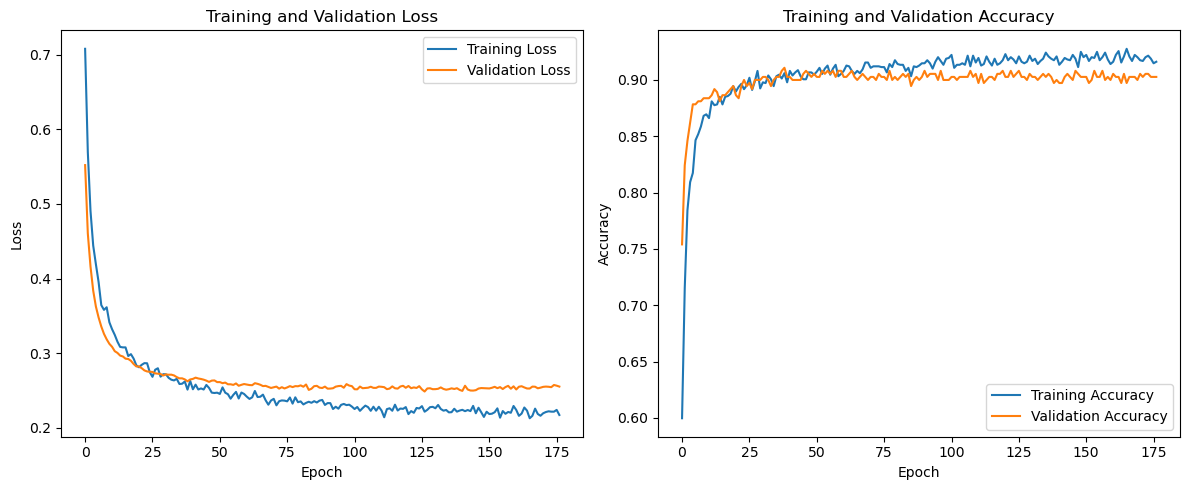

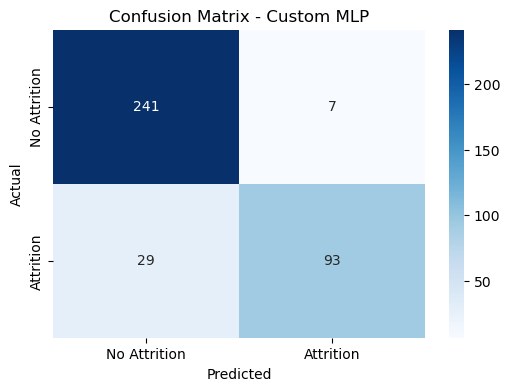

In [22]:
# Converting pandas Series to numpy arrays
if hasattr(y_train, 'values'):
    y_train_np = y_train.values
else:
    y_train_np = y_train

if hasattr(y_test, 'values'):
    y_test_np = y_test.values
else:
    y_test_np = y_test

# Ensuring y is in the right shape
if len(y_train_np.shape) == 1:
    y_train_np = y_train_np.reshape(-1, 1)
if len(y_test_np.shape) == 1:
    y_test_np = y_test_np.reshape(-1, 1)

# Defining the model params
input_size = X_train.shape[1]
hidden_size = 24  # Single hidden layer with 24 neurons
output_size = 1   # Binary classification

# Initializing model
mlp = customMLP(input_size, hidden_size, output_size)

# Training model
history = train(
    model=mlp,
    X_train=X_train,
    y_train=y_train_np,
    X_val=X_test,
    y_val=y_test_np,
    epochs = 400
)


# Evaluatation on the test set
results = evaluate(mlp, X_test, y_test_np)
print("\nTest Results:")
print(f"Accuracy: {results['accuracy']:.4f}")
print(f"Precision: {results['precision']:.4f}")
print(f"Recall: {results['recall']:.4f}")
print(f"F1 Score: {results['f1_score']:.4f}")

# Plotting training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

with torch.no_grad():
    y_pred_tensor = mlp(torch.FloatTensor(X_test))
    y_pred_binary = (y_pred_tensor >= 0.5).float().numpy()


plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_np, y_pred_binary), annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Custom MLP")
plt.show()


* The model achieved an overall accuracy of 90.0%, indicating solid predictive performance.

* It showed strong precision at 91.26%, meaning it was effective at minimizing false positives (only 9 cases).

* Recall was 77.05%, indicating that the model missed some actual attrition cases (28 were misclassified).

* The F1-score of 83.56% suggests a good balance between precision and recall, leaning slightly toward precision.

* The confusion matrix supports this trend — strong in identifying those likely to stay, but with some missed attrition cases.

In summary, the model is reliable when minimizing false positives is important, though improvements may be needed to better catch all at-risk employees.

### 2. XGBoost - Gradient Boosting algorithm

[0]	train-logloss:0.65424	test-logloss:0.65567
[1]	train-logloss:0.62038	test-logloss:0.62381
[2]	train-logloss:0.58608	test-logloss:0.59454
[3]	train-logloss:0.55599	test-logloss:0.56364
[4]	train-logloss:0.53304	test-logloss:0.54785
[5]	train-logloss:0.50678	test-logloss:0.52466
[6]	train-logloss:0.48831	test-logloss:0.50897
[7]	train-logloss:0.46866	test-logloss:0.49265
[8]	train-logloss:0.44927	test-logloss:0.47591
[9]	train-logloss:0.43176	test-logloss:0.46348
[10]	train-logloss:0.41499	test-logloss:0.44780
[11]	train-logloss:0.40244	test-logloss:0.43805
[12]	train-logloss:0.39183	test-logloss:0.42957
[13]	train-logloss:0.37608	test-logloss:0.41756
[14]	train-logloss:0.36236	test-logloss:0.40919
[15]	train-logloss:0.35207	test-logloss:0.40017
[16]	train-logloss:0.33914	test-logloss:0.39030
[17]	train-logloss:0.32599	test-logloss:0.38107
[18]	train-logloss:0.31941	test-logloss:0.37616
[19]	train-logloss:0.31095	test-logloss:0.37249
[20]	train-logloss:0.30219	test-logloss:0.37054
[2

<Figure size 1200x600 with 0 Axes>

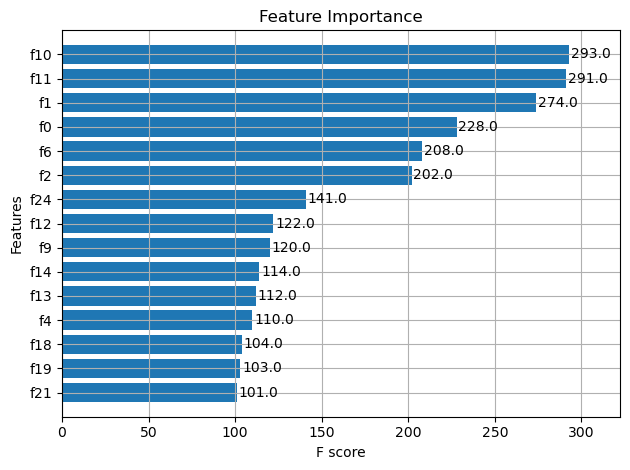

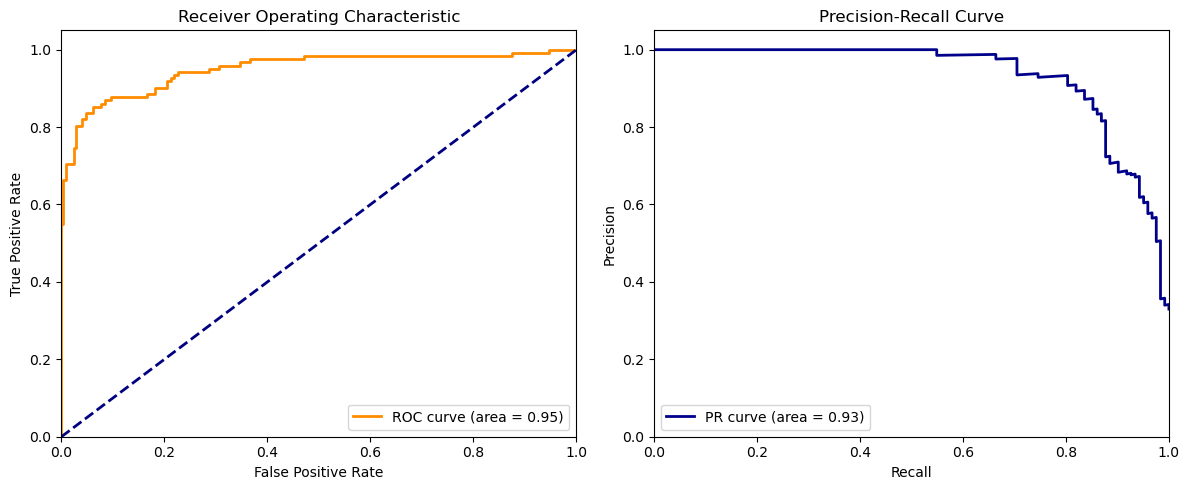


Optimal threshold: 0.50
F1 score at optimal threshold: 0.8596

XGBoost Results with Optimal Threshold:
Accuracy: 0.9135
Precision: 0.9245
Recall: 0.8033
F1 Score: 0.8596


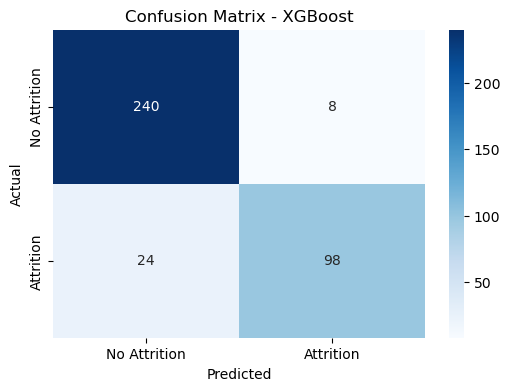

In [23]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Ensuring y is in the right shape
if len(y_train_np.shape) == 1:
    y_train_np = y_train_np.reshape(-1)
else:
    y_train_np = y_train_np.ravel()

if len(y_test_np.shape) == 1:
    y_test_np = y_test_np.reshape(-1)
else:
    y_test_np = y_test_np.ravel()

# Creating DMatrix obj for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train_np)
dtest = xgb.DMatrix(X_test, label=y_test_np)

# Settign parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 1,
    'gamma': 0.1,
    'scale_pos_weight': sum(y_train_np == 0) / sum(y_train_np == 1),
    'seed': 42
}

# creating a watchlist to monitor training performance
watchlist = [(dtrain, 'train'), (dtest, 'test')]

# Training the model
num_round = 500
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_round,
    evals=watchlist,
    early_stopping_rounds=50
)

# predictions
y_pred_proba = xgb_model.predict(dtest)
y_pred = (y_pred_proba >= 0.5).astype(int)

# Evaluation metrics
accuracy = accuracy_score(y_test_np, y_pred)
precision = precision_score(y_test_np, y_pred)
recall = recall_score(y_test_np, y_pred)
f1 = f1_score(y_test_np, y_pred)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test_np, y_pred).ravel()

print("\nXGBoost Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plotting feature importance
plt.figure(figsize=(12, 6))
xgb.plot_importance(xgb_model, max_num_features=15, height=0.8)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


# Plotting ROC curve
from sklearn.metrics import roc_curve, auc, precision_recall_curve

fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# plotting precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test_np, y_pred_proba)
pr_auc = auc(recall_curve, precision_curve)

plt.subplot(1, 2, 2)
plt.plot(recall_curve, precision_curve, color='darkblue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# finding optimal threshold based on F1 score
thresholds = np.linspace(0.1, 0.9, 9)
best_f1 = 0
best_threshold = 0.5

for threshold in thresholds:
    y_pred_temp = (y_pred_proba > threshold).astype(int)
    f1_temp = f1_score(y_test_np, y_pred_temp)

    if f1_temp > best_f1:
        best_f1 = f1_temp
        best_threshold = threshold

print(f"\nOptimal threshold: {best_threshold:.2f}")
print(f"F1 score at optimal threshold: {best_f1:.4f}")

# optimal threshold
y_pred_optimal = (y_pred_proba > best_threshold).astype(int)
accuracy_optimal = accuracy_score(y_test_np, y_pred_optimal)
precision_optimal = precision_score(y_test_np, y_pred_optimal)
recall_optimal = recall_score(y_test_np, y_pred_optimal)

tn_opt, fp_opt, fn_opt, tp_opt = confusion_matrix(y_test_np, y_pred_optimal).ravel()

print("\nXGBoost Results with Optimal Threshold:")
print(f"Accuracy: {accuracy_optimal:.4f}")
print(f"Precision: {precision_optimal:.4f}")
print(f"Recall: {recall_optimal:.4f}")
print(f"F1 Score: {best_f1:.4f}")

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_np, y_pred_optimal), annot=True, fmt="d", cmap="Blues", xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

* The model achieved an overall accuracy of 91.3%, showing strong classification performance.

* Precision was high at 92.45%, indicating the model effectively minimized false positives (only 8).

* Recall reached 80.33%, meaning most actual attrition cases were correctly identified (24 were missed).

* The F1-score of 85.96% reflects a well-balanced model, with solid trade-off between precision and recall.

* The ROC AUC of 0.95 and PR AUC of 0.93 highlight excellent separability and performance across thresholds.

* The confusion matrix confirms the balance—strong at identifying both attrition and non-attrition cases.

In summary, the XGBoost model performs reliably across all metrics, making it well-suited for accurate and balanced attrition prediction.

In [24]:
# grid search for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

# XGBoost classifier for grid search
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=sum(y_train_np == 0) / sum(y_train_np == 1),
    seed=42
)

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

"""
# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1',  # Optimizing for F1 score
    cv=5          # 5-fold cross-validation
)

grid_search.fit(X_train, y_train_np)

# best parameters using grid search
best_params = grid_search.best_params_.copy()  # Copy to avoid modifying the original dictionary

# early_stopping_rounds removed
# best_params.pop('early_stopping_rounds', None)

# best parameters and score
print("\nBest parameters found by grid search:")
print(best_params)  # Updated dictionary without 'early_stopping_rounds'
print(f"Best F1 score: {grid_search.best_score_:.4f}")
"""

'\n# GridSearchCV\ngrid_search = GridSearchCV(\n    estimator=xgb_clf,\n    param_grid=param_grid,\n    scoring=\'f1\',  # Optimizing for F1 score\n    cv=5          # 5-fold cross-validation\n)\n\ngrid_search.fit(X_train, y_train_np)\n\n# best parameters using grid search\nbest_params = grid_search.best_params_.copy()  # Copy to avoid modifying the original dictionary\n\n# early_stopping_rounds removed\n# best_params.pop(\'early_stopping_rounds\', None)\n\n# best parameters and score\nprint("\nBest parameters found by grid search:")\nprint(best_params)  # Updated dictionary without \'early_stopping_rounds\'\nprint(f"Best F1 score: {grid_search.best_score_:.4f}")\n'


Best Model Test Results:
Accuracy: 0.9000
Precision: 0.8899
Recall: 0.7951
F1 Score: 0.8398


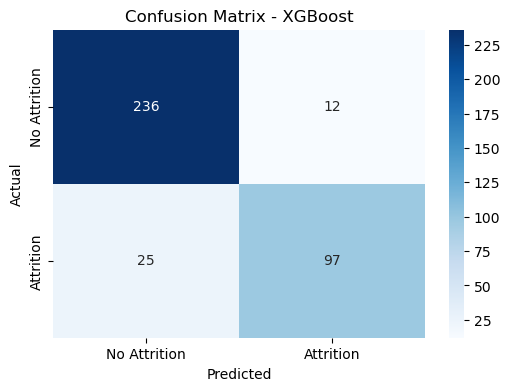

In [26]:
best_params = {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}

# Training the final model with best parameters
best_model = XGBClassifier(**best_params)  # Instantiate model with best parameters
best_model.fit(X_train, y_train_np, eval_set=[(X_test, y_test_np)], verbose=False)

# Making predictions with the best model
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Evaluating the best model
accuracy_best = accuracy_score(y_test_np, y_pred_best)
precision_best = precision_score(y_test_np, y_pred_best)
recall_best = recall_score(y_test_np, y_pred_best)
f1_best = f1_score(y_test_np, y_pred_best)

print("\nBest Model Test Results:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1 Score: {f1_best:.4f}")

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_np, y_pred_best), annot=True, fmt="d", cmap="Blues", xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


### 3.SVM Implementation

In [27]:
import numpy as np

class SVM_RBF:
    def __init__(self, C=1.0, gamma=0.1, tol=1e-3, max_passes=5):
        """
        Parameters:
          C         : Regularization parameter.
          gamma     : Parameter for the RBF kernel.
          tol       : Tolerance for stopping criterion.
          max_passes: Number of passes over the data with no alpha changes before stopping.
        """
        self.C = C
        self.gamma = gamma
        self.tol = tol
        self.max_passes = max_passes

    def _kernel(self, X1, X2):
        """
        Compute the RBF (Gaussian) kernel between X1 and X2.
        This method supports different input dimensions.
        """
        # If both X1 and X2 are 1-D vectors, compute a single kernel value
        if np.ndim(X1) == 1 and np.ndim(X2) == 1:
            return np.exp(-self.gamma * np.linalg.norm(X1 - X2)**2)
        # If one of them is 1-D, compute kernel between the vector and each row of the matrix
        elif np.ndim(X1) == 1:
            return np.exp(-self.gamma * np.linalg.norm(X1 - X2, axis=1)**2)
        elif np.ndim(X2) == 1:
            return np.exp(-self.gamma * np.linalg.norm(X1 - X2, axis=1)**2)
        else:
            # Vectorized computation for two matrices:
            X1_sq = np.sum(X1**2, axis=1).reshape(-1, 1)
            X2_sq = np.sum(X2**2, axis=1).reshape(1, -1)
            # Compute the squared Euclidean distance and then the kernel matrix
            return np.exp(-self.gamma * (X1_sq + X2_sq - 2 * np.dot(X1, X2.T)))

    def _decision_function(self, x):
        """
        Compute the decision function f(x) = sum_i(alpha_i * y_i * K(x_i, x)) + b
        for a single sample x.
        """
        # Compute kernel between x and all training samples
        K_x = self._kernel(self.X, x)
        return np.sum(self.alphas * self.y * K_x) + self.b

    def fit(self, X, y):
        """
        Train the SVM classifier using a simplified SMO algorithm.

        Parameters:
          X : Training data (n_samples x n_features)
          y : Labels (should be -1 or +1)
        """
        X = np.array(X)
        y = np.array(y)
        n_samples, _ = X.shape

        # Initialize Lagrange multipliers and bias term
        self.alphas = np.zeros(n_samples)
        self.b = 0.0
        self.X = X
        self.y = y

        # Precompute the full kernel matrix for efficiency
        self.K = self._kernel(X, X)

        passes = 0
        while passes < self.max_passes:
            num_changed_alphas = 0
            for i in range(n_samples):
                E_i = self._decision_function(self.X[i]) - self.y[i]
                # Check if the sample violates the KKT conditions
                if ((self.y[i]*E_i < -self.tol and self.alphas[i] < self.C) or
                    (self.y[i]*E_i > self.tol and self.alphas[i] > 0)):
                    # Randomly select j != i
                    j = np.random.randint(0, n_samples)
                    while j == i:
                        j = np.random.randint(0, n_samples)
                    E_j = self._decision_function(self.X[j]) - self.y[j]

                    alpha_i_old = self.alphas[i]
                    alpha_j_old = self.alphas[j]

                    # Compute L and H bounds for alpha[j]
                    if self.y[i] != self.y[j]:
                        L = max(0, self.alphas[j] - self.alphas[i])
                        H = min(self.C, self.C + self.alphas[j] - self.alphas[i])
                    else:
                        L = max(0, self.alphas[i] + self.alphas[j] - self.C)
                        H = min(self.C, self.alphas[i] + self.alphas[j])
                    if L == H:
                        continue

                    # Compute eta (the second derivative of the objective function)
                    eta = 2 * self.K[i, j] - self.K[i, i] - self.K[j, j]
                    if eta >= 0:
                        continue

                    # Update alpha[j]
                    self.alphas[j] = self.alphas[j] - (self.y[j]*(E_i - E_j)) / eta
                    # Clip alpha[j] to be within [L, H]
                    self.alphas[j] = np.clip(self.alphas[j], L, H)

                    if abs(self.alphas[j] - alpha_j_old) < 1e-5:
                        continue

                    # Update alpha[i] with the change in alpha[j]
                    self.alphas[i] = self.alphas[i] + self.y[i]*self.y[j]*(alpha_j_old - self.alphas[j])

                    # Compute the new bias term b
                    b1 = (self.b - E_i
                          - self.y[i]*(self.alphas[i] - alpha_i_old)*self.K[i, i]
                          - self.y[j]*(self.alphas[j] - alpha_j_old)*self.K[i, j])
                    b2 = (self.b - E_j
                          - self.y[i]*(self.alphas[i] - alpha_i_old)*self.K[i, j]
                          - self.y[j]*(self.alphas[j] - alpha_j_old)*self.K[j, j])
                    if 0 < self.alphas[i] < self.C:
                        self.b = b1
                    elif 0 < self.alphas[j] < self.C:
                        self.b = b2
                    else:
                        self.b = (b1 + b2) / 2.0

                    num_changed_alphas += 1

            if num_changed_alphas == 0:
                passes += 1
            else:
                passes = 0

        # After training, identify the support vectors
        support_idx = self.alphas > 1e-5
        self.support_vectors_ = self.X[support_idx]
        self.support_alphas = self.alphas[support_idx]
        self.support_y = self.y[support_idx]

    def predict(self, X):
        """
        Predict the class labels for samples in X.

        Returns:
          An array of predictions (-1 or +1).
        """
        X = np.array(X)
        predictions = []
        for x in X:
            pred = self._decision_function(x)
            # Use sign of decision function as prediction
            predictions.append(np.sign(pred))
        return np.array(predictions)


Accuracy: 0.8891891891891892
Precision: 0.9764705882352941
Recall: 0.680327868852459
F1 Score: 0.8019323671497585

Classification Report:
               precision    recall  f1-score   support

          -1       0.86      0.99      0.92       248
           1       0.98      0.68      0.80       122

    accuracy                           0.89       370
   macro avg       0.92      0.84      0.86       370
weighted avg       0.90      0.89      0.88       370



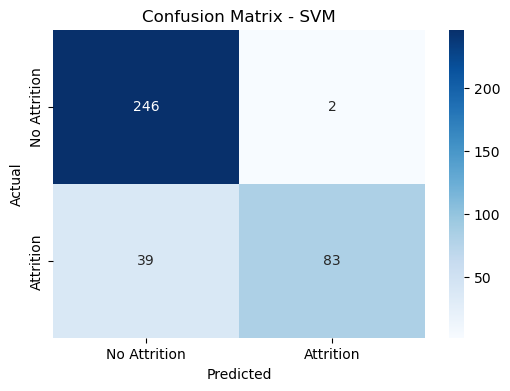

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Convert labels: already done
y_train_mod = np.where(y_train == 0, -1, 1)
y_test_mod = np.where(y_test == 0, -1, 1)

# Initialize and fit the SVM
svm_rbf = SVM_RBF(C=1.0, gamma=0.01, tol=1e-3, max_passes=5)
svm_rbf.fit(X_train, y_train_mod)
y_pred = svm_rbf.predict(X_test)

# Calculate metrics
precision = precision_score(y_test_mod, y_pred)
recall = recall_score(y_test_mod, y_pred)
f1 = f1_score(y_test_mod, y_pred)
cm = confusion_matrix(y_test_mod, y_pred)

print("Accuracy:", accuracy_score(y_test_mod, y_pred))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:\n", classification_report(y_test_mod, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_mod, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

* The model achieved an overall accuracy of 88.9%, indicating strong general performance.

* It demonstrated very high precision (97.6%), meaning it was highly effective at correctly identifying non-attrition cases while minimizing false positives (only 2).

* However, the recall was 68.0%, suggesting the model missed some true attrition cases (39 were misclassified).

* The F1-score of 80.2% reflects a balanced trade-off, but slightly favors precision.

* The confusion matrix confirms this behavior — excellent at identifying employees who stayed, but conservative in predicting attrition.

In summary, the model is ideal when false positives must be avoided, but may require enhancement if capturing all potential attrition cases is critical.




### 4. Random Forest Classifier

In [29]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeClassifier
import numpy as np

class RandomForest(BaseEstimator, ClassifierMixin):
    def __init__(self, n_trees=10, max_depth=None, min_samples_split=2, n_features=None, criterion='gini', random_state=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.criterion = criterion
        self.random_state = random_state
        self.trees = []

        if self.random_state is not None:
            np.random.seed(self.random_state)

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                max_features=self.n_features,
                criterion=self.criterion,
                random_state=self.random_state
            )
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_sample(self, X, y):
        indices = np.random.choice(len(X), len(X), replace=True)
        return X[indices], y.iloc[indices].values

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.apply_along_axis(self._majority_vote, axis=0, arr=tree_predictions)

    def _majority_vote(self, predictions):
        values, counts = np.unique(predictions, return_counts=True)
        return values[np.argmax(counts)]


Accuracy: 0.9108108108108108
Precision: 0.978494623655914
Recall: 0.7459016393442623
F1 Score: 0.8465116279069768

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       248
           1       0.98      0.75      0.85       122

    accuracy                           0.91       370
   macro avg       0.93      0.87      0.89       370
weighted avg       0.92      0.91      0.91       370



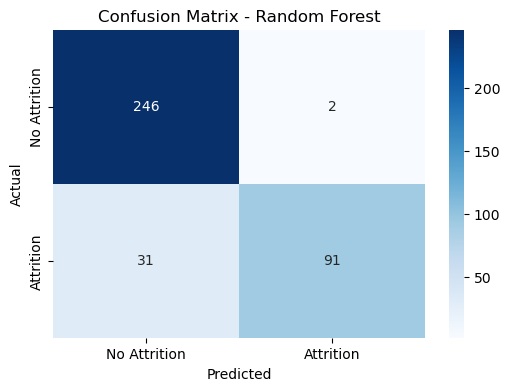

In [30]:
# Train Random Forest
rf = RandomForest(n_trees=150, max_depth=15, min_samples_split=3, n_features=None, random_state=42)

rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


* The model achieved a high accuracy of 91.08%, indicating consistent and strong performance overall.

* Precision was very high at 97.84%, showing the model was excellent at minimizing false positives (only 2).

* Recall was 74.59%, suggesting that while most attrition cases were captured, 31 were still misclassified.

* The F1-score stood at 84.56%, indicating a slightly precision-biased balance between precision and recall.

* The confusion matrix confirms this: the model confidently predicted those staying but missed a portion of those who left.

In summary, the Random Forest model is highly reliable for avoiding false alarms, but recall could be improved to better capture all at-risk employees.

### 5. K Nearest Neibhors Classifier

Accuracy: 0.9081081081081082
Precision: 0.94
Recall: 0.7704918032786885
F1 Score: 0.8468468468468469

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93       248
           1       0.94      0.77      0.85       122

    accuracy                           0.91       370
   macro avg       0.92      0.87      0.89       370
weighted avg       0.91      0.91      0.91       370



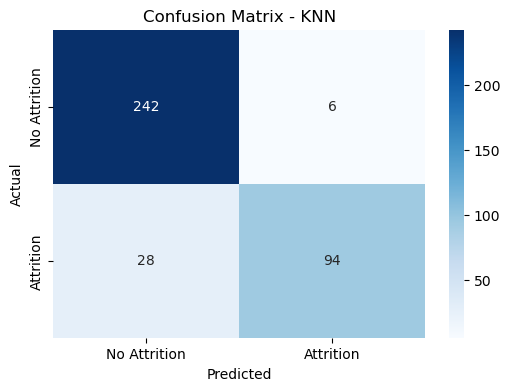

In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create KNN classifier with k=3
knn = KNeighborsClassifier(
    n_neighbors=2,
    weights='uniform',
    metric='manhattan',
    p=1
)
# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

* KNN achieved an overall accuracy of 90.81%, indicating solid performance.

* Precision was high at 94%, meaning the model effectively minimized false positives (only 6 cases).

* Recall was 77.05%, suggesting a few actual attrition cases were missed (28 misclassified).

* The F1-score of 84.68% reflects a good balance between precision and recall.

* The confusion matrix confirms consistent performance—strong at identifying both attrition and non-attrition cases.

In summary, the KNN model performed reliably and maintained a healthy trade-off between precision and recall, making it a strong and simple model for predicting employee attrition.

### 6. Ensemble Model

Model	Strength

**Logistic Regression**	- Strong with linear relationships; interpretable baseline.

**Random Forest** -	Great with feature importance, handles non-linearity well.

**MLPClassifier (Neural Net)** -	Good at capturing complex interactions; flexible.

**Gradient Boosting** -	Powerful and robust; often gives state-of-the-art performance.

By combining these, we can balance:

- Bias & variance across models

- Linear & non-linear capabilities

- Interpretability vs power




In [32]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Selected Base models
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
mlp = MLPClassifier(max_iter=300, random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Ensemble: Voting Classifier (soft voting)
ensemble = VotingClassifier(estimators=[
    ('lr', logreg),
    ('rf', rf),
    ('mlp', mlp),
    ('gb', gb)
], voting='soft')

# Train the ensemble
ensemble.fit(X_train, y_train)



VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('mlp',
                              MLPClassifier(max_iter=300, random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       248
           1       0.94      0.80      0.86       122

    accuracy                           0.92       370
   macro avg       0.92      0.89      0.90       370
weighted avg       0.92      0.92      0.91       370

Accuracy: 0.9162162162162162
Precision: 0.941747572815534
Recall: 0.7950819672131147
F1 Score: 0.8622222222222222


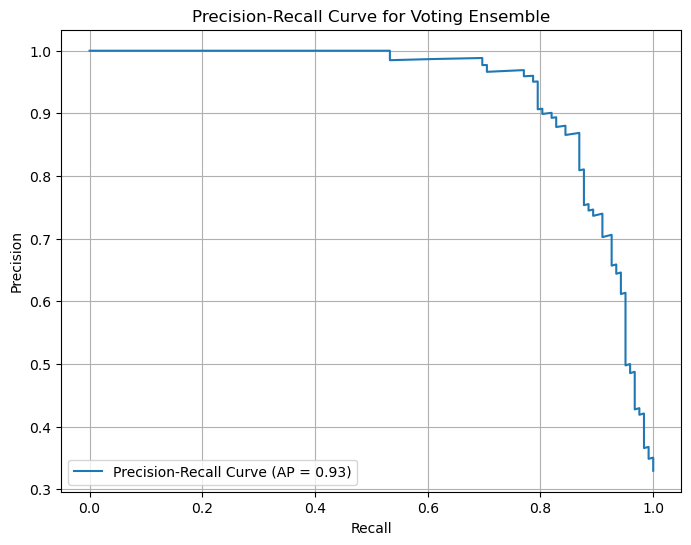

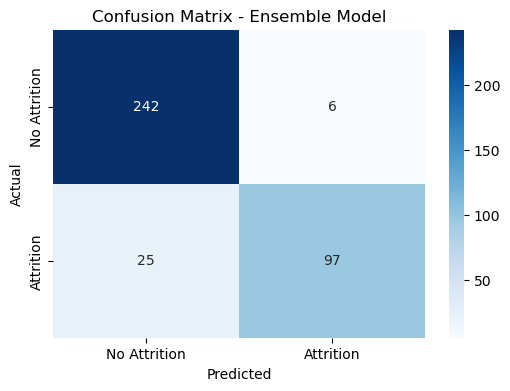

In [33]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Evaluate ensemble
y_pred_ensemble = ensemble.predict(X_test)

print(classification_report(y_test, y_pred_ensemble))
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Precision:", precision_score(y_test, y_pred_ensemble))
print("Recall:", recall_score(y_test, y_pred_ensemble))
print("F1 Score:", f1_score(y_test, y_pred_ensemble))

y_scores = ensemble.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Average Precision Score
avg_precision = average_precision_score(y_test, y_scores)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Voting Ensemble')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Ensemble Model")
plt.show()

* The model achieved the highest overall accuracy of 91.62%, reflecting excellent performance.

* Precision was very strong at 94.15%, showing the model was highly effective at minimizing false positives (only 6 cases).

* Recall was 79.59%, indicating that most attrition cases were detected, though 25 were missed.

* The F1-score reached 86.22%, showing a well-balanced trade-off between precision and recall.

* The Precision-Recall AUC was 0.93, demonstrating reliable performance across thresholds.

* The confusion matrix confirms solid results, accurately predicting both attrition and non-attrition with minimal error.

In summary, the ensemble model effectively combines the strengths of individual classifiers, offering the best balance of accuracy, precision, and recall—making it a top choice for dependable attrition prediction.